<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_kmeans_PCA_Elbow_diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans

In [ ]:
diamond = pd.read_csv('/content/diamonds.csv')

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [ ]:
diamond.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [ ]:
diamond.duplicated().sum()

np.int64(146)

In [ ]:
diamond.drop_duplicates(inplace=True)

In [ ]:
diamond.duplicated().sum()

np.int64(0)

In [ ]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   x        53794 non-null  float64
 7   y        53794 non-null  float64
 8   z        53794 non-null  float64
 9   price    53794 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in diamond.select_dtypes(include=['object']).columns:
  diamond[i] = le.fit_transform(diamond[i])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in diamond.columns:
  sc.fit_transform(diamond[[i]])

In [ ]:
wcss = []

In [ ]:
for i in range(1,11):
  K_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
  K_means.fit(diamond)
  wcss.append(K_means.inertia_)

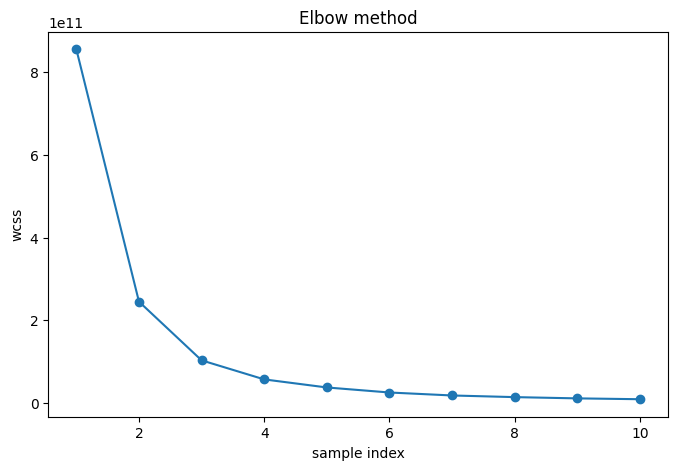

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('Elbow method')
plt.xlabel('sample index')
plt.ylabel('wcss')
plt.show()


In [ ]:
model = KMeans(n_clusters=2,init = 'k-means++',random_state=42)
y_kmeans = model.fit_predict(diamond)
diamond['clusters'] = y_kmeans

In [ ]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
diamond

,carat,cut,color,clarity,depth,table,x,y,z,price,clusters
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326,1
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326,1
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327,1
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334,1
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335,1
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757,1
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757,1
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757,1
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757,1


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(diamond)
x_pca

array([[-3.60706616e+03, -2.04636884e+00],
       [-3.60706575e+03,  4.30032278e+00],
       [-3.60606544e+03,  8.48519439e+00],
       ...,
       [-1.17606497e+03,  2.56335648e+00],
       [-1.17606458e+03,  1.03507600e+00],
       [-1.17606527e+03, -2.27916506e+00]])

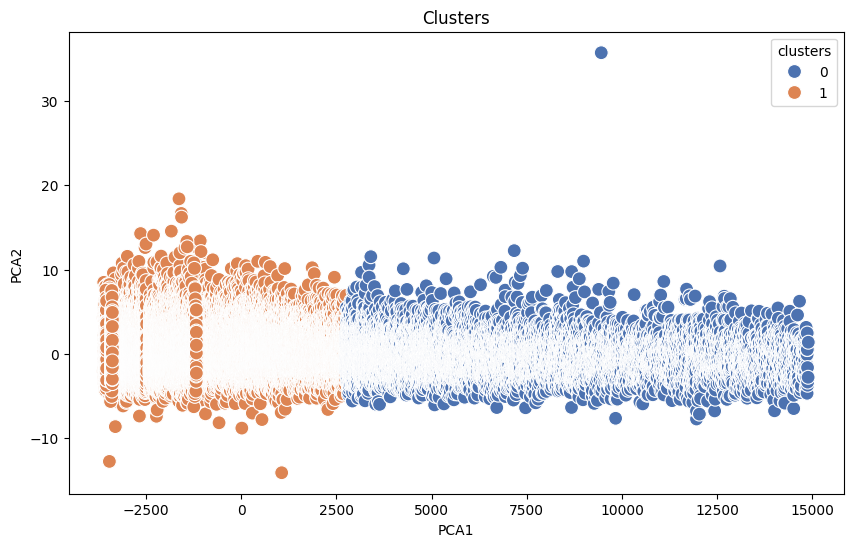

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0],y = x_pca[:,1],hue=diamond['clusters'],palette='deep',s=100)
plt.title('Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()